In [1]:
import sys

# only for floor: (or if you feel adventurous and want to download this file.)
# sys.path.append('../common_code')
# import script that has many standard functions:
# from PostProcessingScripts import * 

import pandas as pd # # for reading datafiles 

# just to make the jupyter notebook wider:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.dates as mdates
from datetime import date
import datetime 
import numpy as np
import matplotlib.pyplot as plt
# for e.g., minor ticks 
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib
import seaborn as sns # just for nice colors 
colors = sns.color_palette("husl", 15)

### Plotting functions

Below are some functions that are used for plotting (to make legends, labels, size of ticks etc.). <br>




In [2]:


###### Plotting settings and functions ###### 

from matplotlib import rc   
rc('font', family='serif', weight = 'bold')
rc('text', usetex=True)
# matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rc('axes', linewidth=2)

matplotlib.rcParams['xtick.major.size'] = 12
matplotlib.rcParams['ytick.major.size'] = 12
matplotlib.rcParams['xtick.minor.size'] = 8
matplotlib.rcParams['ytick.minor.size'] = 8
matplotlib.rcParams['font.weight']= 'bold'
matplotlib.rcParams.update({'font.weight': 'bold'})

fs = 24 # fontsize for plots
rc('axes', linewidth=2)


def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True, labelpad_x=None, labelpad_y=None):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5


    if labelpad:
        labelpad_x = labelpad
        labelpad_y = labelpad

    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')


    if labelSizeMajor==10:
        ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad_x)#,fontweight='bold')
        ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad_y)#, fontweight='bold')    
    else:
        ax.set_xlabel(nameX, fontsize=labelSizeMajor,labelpad=labelpad_x)#,fontweight='bold')
        ax.set_ylabel(nameY, fontsize=labelSizeMajor,labelpad=labelpad_y)#, fontweight='bold')  

    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax




def adjust_lightness(color, amount=0.5):
    """adjusts lightness of a color, 
    great when you want lighter color version but dont want it to be transparant"""
    
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])





In [3]:


def cumhist_stop_year(data, reverse=False, mark=None, ax=None, stop_year=2024, **kwargs):
    """
    Plot a cumulative histogram of `data`, optionally with certain indices marked with an x.
    it will stop plotting at the given year 'stop_year'

    Parameters
    ----------
    data : array-like
        Data to include in the histogram
    reverse : bool, optional
        If False (default), the histogram increases with increasing `data`. If True, it decreases with increasing `data`
    mark : array-like, optional
        An array of indices to mark with an x
    ax : matplotlib.pyplot.axes, optional
        Axis on which to plot the confusion matrix. Default: current axis.
    stop_year: date
        year at which the cumhist will stop plotting (for video)
    date_latest_observing_run: date
        date of the latest observing run (e.g., beginO4) to which detections are known)
    
    kwargs : dict, optional
        Keyword arguments to be passed to `matplotlib.pyplot.step`
        
    

    Returns
    -------
    p : list
        The list of `matplotlib.lines.Line2D` objects returned by `matplotlib.pyplot.step`
    """
    
    date_latest_observing_run = calculate_fraction_days_year(d0_year=2023, d1=date(2023, 5, 24)) # 24 may 2023
    
    if mark is None:
        mark = np.zeros(len(data), bool)
    if ax is None:
        ax = plt.gca()
    i = np.argsort(data)
    x = data[i]
    
    # only plot until given stop_year value
    mask_stop_year = data[i]< stop_year
    mark = mark[i]
    
    if np.sum(mask_stop_year)>=1:
        x = np.append(x[mask_stop_year], x[mask_stop_year][-1])
        y = np.linspace(0., x.size-1, x.size) 
        if reverse:
            y = y[::-1]
            
        ax.step(x, y, **kwargs)
        y_max = y[-1] 
        
        # add a horizontal line to draw detections until time plotted (otherwise it only updates when a new detection happens) 
        min_stop = min(stop_year, date_latest_observing_run)
        ax.plot([x[-1], min_stop], [y[-1], y[-1]], **kwargs)
        
        
    else:
        y_max=0
        
    return y_max
 



def cumhist(data, reverse=False, mark=None, ax=None, **kwargs):
    """
    Plot a cumulative histogram of `data`, optionally with certain indices marked with an x.

    Parameters
    ----------
    data : array-like
        Data to include in the histogram
    reverse : bool, optional
        If False (default), the histogram increases with increasing `data`. If True, it decreases with increasing `data`
    mark : array-like, optional
        An array of indices to mark with an x
    ax : matplotlib.pyplot.axes, optional
        Axis on which to plot the confusion matrix. Default: current axis.
    kwargs : dict, optional
        Keyword arguments to be passed to `matplotlib.pyplot.step`

    Returns
    -------
    p : list
        The list of `matplotlib.lines.Line2D` objects returned by `matplotlib.pyplot.step`
    """
    if mark is None:
        mark = np.zeros(len(data), bool)
    if ax is None:
        ax = plt.gca()
    i = np.argsort(data)
    x = data[i]
    mark = mark[i]
    x = np.append(x, x[-1])
    y = np.linspace(0., x.size, x.size) -1
    if reverse:
        y = y[::-1]
    p = ax.step(x, y, **kwargs)
    ax.scatter(data[i][mark], (y[:-1] + 0.5 * np.diff(y))[mark], marker='x')
    return p






def find_position_plot(year):
    """ find position of a given year relative to the plot """
    position  = (year-2014)/(2040-2014) # start = 2014, end of plot = 2040 
    return position



def plot_detector_labels(axe):
    labels = [r'$\textbf{O1}$', r'$\textbf{O2}$', r'$\textbf{O3}$',  r'$\textbf{O4}$',  r'$\textbf{O5}$',  r'$\textbf{A}^{\#}$',   r'$\textbf{CE/ET}$'] # r'$\textbf{next-gen:}$' +'\n' + r'$\textbf{CE/ET}$' ]
    label_centers = [2015.9, 2017.35, 2019.78, 2024.26, 2027, 2032., 2037.3]
    for ind_year, year in enumerate(label_centers):
        position = find_position_plot(year)
        axe.text(position, 1-0.009, labels[ind_year] , rotation = 0, fontsize = fs+10, color = 'k', ha = 'center', va='top', transform=axe.transAxes, zorder=100)#, weight = 'bold')



        
def strip_GW_from_GW_in_name(GW_events_list):
    fmt = 'GW%y%m%d'
    """ strip GWnames of the 'GW' in front of label and determine datetime of events"""
    GW_events_list_stripped = np.zeros_like(GW_events_list)

    for ind_GW, GWlist in enumerate(GW_events_list):
        
        d2 = GWlist.split('_')[0]
        GW_events_list_stripped[ind_GW] = d2
        
    return GW_events_list_stripped



def obtain_GW_datetimes(GW_events_list):
    fmt = 'GW%y%m%d'
    """ strip GWnames of the 'GW' in front of label and determine datetime of events"""
    GW_events_list_datetimes = GW_events_list
    # iterate over DCO flavors
    for ind_DCO, GWlist in enumerate(GW_events_list):
        strp_ = []
        for GW_ in GWlist:
            d2 = datetime.datetime.strptime(GW_.split('_')[0], fmt)
            
            
            d0 = date(d2.year, 1, 1) # first day of the year of the event
            delta_days_since_d0 = date(d2.year, d2.month, d2.day) - d0
            fraction_year = delta_days_since_d0/((date(d2.year+1, 1, 1) - d0))
            d2 = d2.year + fraction_year  # this adjusts for leap years etc. 
            strp_.append(d2)  
            
        GW_events_list_datetimes[ind_DCO] = strp_
        
    return GW_events_list_datetimes




def create_GW_list_from_data(label_dataset='GWTC3_pop', threshold_mass_NS = 2.5, print_output=False):
    """
    threshold_mass_NS = 2.5 [Msun] # threshold mass below which compact object is NS based on GW median posterior mass 
    label_dataset options: ['GWTC3_pop_far<0_25yr', 'GWTC3_pop_far<1yr', 'GWOSC', ]
    """
        
    if label_dataset in ['GWTC3_pop_far<0_25yr', 'GWTC3_pop_far<1yr']:
        # data based on catalog definition: 
        file_name = 'gwtc-3_pop_events_table_1.csv'
        header_GW_name = 'Event name'
        
    elif label_dataset in ['GWOSC', 'GWOSC_plus_external']:
        # data from the GWOSC, downloaded from the csv file at https://www.gw-openscience.org/eventapi/html/GWTC/ 
        file_name = 'GWOSC_events.csv'
        header_GW_name = 'commonName'
        
    elif label_dataset in ['4-OGC']:
        file_name = '4OGC_top_events_final_final_final.csv'
        header_GW_name = 'commonName'
    
    # read in the GW detections names from csv catalog file
    df = pd.read_csv('./GWcatalogData/'+file_name, encoding='latin-1')
    GWnames = df[header_GW_name]
    mass_1_source, mass_2_source = df['mass_1_source'], df['mass_2_source']

    mask_mass_1_NS, mask_mass_2_NS = (mass_1_source <= 2.5), (mass_2_source <= 2.5)
    
    BBH_list = GWnames[(mass_1_source > threshold_mass_NS)&(mass_2_source > threshold_mass_NS)].to_numpy()
    BHNS_list = GWnames[((mass_1_source > threshold_mass_NS)&(mass_2_source <= threshold_mass_NS)) | ((mass_1_source <= threshold_mass_NS)&(mass_2_source > threshold_mass_NS))].to_numpy()
    BNS_list = GWnames[(mass_1_source <= threshold_mass_NS)&(mass_2_source <= threshold_mass_NS)].to_numpy()
    
    
    if label_dataset ==  'GWTC3_pop_far<0_25yr':
        # remove events that have 1 >= FAR >= 0.25 yr^-1
        FAR_min = df['FAR_min']
        mask_too_high_FAR = (FAR_min>=0.25)
        
        BBH_list = GWnames[(mass_1_source > threshold_mass_NS)&(mass_2_source > threshold_mass_NS) & (mask_too_high_FAR==0)]
        BHNS_list = GWnames[((mass_1_source > threshold_mass_NS)&(mass_2_source <= threshold_mass_NS)& (mask_too_high_FAR==0)) | ((mass_1_source <= threshold_mass_NS)&(mass_2_source > threshold_mass_NS)& (mask_too_high_FAR==0))]
        BNS_list = GWnames[(mass_1_source <= threshold_mass_NS)&(mass_2_source <= threshold_mass_NS)& (mask_too_high_FAR==0)]            

    elif label_dataset=='GWOSC_plus_external':
        # extra events from 
        # O1 extra events: ['GW151216'], from https://arxiv.org/pdf/1902.10331.pdf, but removed in OGC-4, so not included 
        # O2 extra events: [GW170121, GW170304, GW170727] # https://arxiv.org/pdf/1904.07214.pdf : O2 extra events based on  including 14 BBH mergers with pastro >0.5 https://arxiv.org/pdf/1910.05331.pdf, 
        # O2 extra events GW170425, GW170202, and GW170403, with lower p_astro (but still in between 0.5-0.8 from https://arxiv.org/pdf/1904.07214.pdf ) and confirmed in https://arxiv.org/pdf/1910.05331.pdf albeit with lower p_astro
        # O3 exrta events: GW191224 043228, GW200106 134123, GW200129 114245, GW200210 005122, GW200214 223307, GW200305 084739, and GW200318 ] based on https://arxiv.org/pdf/2112.06878.pdf OGSS-4
        # GW170816 ='GW170817A', but I dont have a better way to count double events (ie happening at the same day) at this time, so hence the hack . found by https://arxiv.org/abs/1910.09528 they also found GWC170402
        # 10 new events in O3a from IAS group, see https://arxiv.org/pdf/2201.02252.pdf Table 1 [GW190704, 'GW190707', GW190711, GW190718,  GW190814,  GW190818,  GW190821, GW190906, GW190910, GW190920 ]
        # 5 new BBH events in O3b from Mehta et al. 2023; https://arxiv.org/pdf/2311.06061.pdf, see table I: ['GW200109', 'GW191228', 'GW200225', 'GW191122', 'GW200316' ] 
        external_found_BBHs_list = np.asarray(['GW151216', 'GW170121', 'GW170304', 'GW170727', 'GW170425', 'GW170202', 'GW170403', 'GW191224', 'GW200106','GW200129', 'GW200210', 'GW200214', 'GW200305', 'GW200318', 'GW170816', \
                                               'GW200109', 'GW191228', 'GW200225', 'GW191122', 'GW200316',\
                                               'GW190704', 'GW190707', 'GW190711', 'GW190718',  'GW190814',  'GW190818',  'GW190821', 'GW190906', 'GW190910', 'GW190920'])
        
        
        # BBH_list has GWOSC events, add the externally found events
        BBH_list = np.concatenate((BBH_list, external_found_BBHs_list))
        
        #get 4-OGC events:
        file_name = '4OGC_top_events_final_final_final.csv'
        header_GW_name = 'commonName'
        df = pd.read_csv('./GWcatalogData/'+file_name, encoding='latin-1')
        GWnames = df[header_GW_name]
        mass_1_source, mass_2_source = df['mass_1_source'], df['mass_2_source']
        mask_mass_1_NS, mask_mass_2_NS = (mass_1_source <= 2.5), (mass_2_source <= 2.5)
        
        #add 4-OGC events, strip all events from 'GW' and find unique set of events (since indepdent catalogs overlap), then sort them by time
        BBH_list = np.sort(np.unique(strip_GW_from_GW_in_name(np.concatenate((BBH_list, GWnames[(mass_1_source > threshold_mass_NS)&(mass_2_source > threshold_mass_NS)].to_numpy())))))
        BHNS_4OGC = GWnames[((mass_1_source > threshold_mass_NS)&(mass_2_source <= threshold_mass_NS)) | ((mass_1_source <= threshold_mass_NS)&(mass_2_source > threshold_mass_NS))].to_numpy()
        BHNS_list = np.sort(np.unique(strip_GW_from_GW_in_name(np.concatenate((BHNS_list, BHNS_4OGC)))))
        BNS_list = np.sort(np.unique(strip_GW_from_GW_in_name(np.concatenate((BNS_list, GWnames[(mass_1_source <= threshold_mass_NS)&(mass_2_source <= threshold_mass_NS)].to_numpy())))))
    
    
    GW_events_list = [BBH_list, BHNS_list, BNS_list]
    
    if print_output==True:
        print('counting O1+O2+O3: total = %s,  %s BBHs, %s BHNSs, %s BNSs'%(len(BBH_list)+len(BHNS_list)+len(BNS_list), len(BBH_list), len(BHNS_list), len(BNS_list)), 'for %s'%label_dataset)
    
    return GW_events_list




def plot_detector_labels_O4(axe):
    labels = [r'$\textbf{O1}$', r'$\textbf{O2}$', r'$\textbf{O3}$',  r'$\textbf{O4}$']#,  r'$\textbf{O5}$',  r'$\textbf{Voyager}$',   r'$\textbf{CE/ET}$'] # r'$\textbf{next-gen:}$' +'\n' + r'$\textbf{CE/ET}$' ]
    label_centers = [2015.9, 2017.3, 2019.78, 2024.26]
    for ind_year, year in enumerate(label_centers):
        axe.annotate(labels[ind_year], (year, 1-0.129), xycoords=('data','figure fraction'),  rotation = 0, fontsize = fs+10, color = 'k', ha = 'center', va='top', zorder=100)

        
    return 

def make_cumhist_past_detections(ax, detectionlist, y_max_all, stop_year, DCOcolors, **kwargs):
    #### plots cumhist of past detections up to min(stop_year, O4begin) #####
    for ind_DCO, DCOdetections in enumerate(detectionlist):
        y_max = cumhist_stop_year(data=np.asarray(DCOdetections), ax=ax, c=DCOcolors[ind_DCO], stop_year=stop_year, **kwargs)
        y_max_all.append(y_max)


        # annotate labels for BHBH, BHNS, BNS
        if stop_year<2021:
            if ind_DCO==0:
                axe.annotate(r'$\textbf{BH-BH: } %s$'%int(y_max), (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
            if ind_DCO==1:
                axe.annotate(r'$\textbf{BH-NS: } %s$'%int(y_max), (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
            if ind_DCO==2:
                axe.annotate(r'$\textbf{NS-NS: } %s$'%int(y_max), (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )

    return y_max_all








# obtain a list with GW events for all three flavors for each catalog 
GW_events_list = create_GW_list_from_data(label_dataset='GWOSC', print_output=True)    
GW_events_list = create_GW_list_from_data(label_dataset='GWTC3_pop_far<0_25yr', print_output=True) 
GW_events_list = create_GW_list_from_data(label_dataset='GWTC3_pop_far<1yr', print_output=True)  
GW_events_list = create_GW_list_from_data(label_dataset='4-OGC', print_output=True) 
GW_events_list = create_GW_list_from_data(label_dataset='GWOSC_plus_external', print_output=True) 



counting O1+O2+O3: total = 90,  85 BBHs, 3 BHNSs, 2 BNSs for GWOSC
counting O1+O2+O3: total = 67,  63 BBHs, 2 BHNSs, 2 BNSs for GWTC3_pop_far<0_25yr
counting O1+O2+O3: total = 76,  70 BBHs, 4 BHNSs, 2 BNSs for GWTC3_pop_far<1yr
counting O1+O2+O3: total = 94,  90 BBHs, 2 BHNSs, 2 BNSs for 4-OGC
counting O1+O2+O3: total = 111,  105 BBHs, 4 BHNSs, 2 BNSs for GWOSC_plus_external


In [4]:
# get the day for today 
datetime_today = date.today()


def calculate_fraction_days_year(d0_year=2023, d1=date(datetime_today.year, datetime_today.month, datetime_today.day)):
    """ 
    returns for a given date the fraction of the year that has passed since 2023
    """
    d0 = date(d0_year, 1, 1) # first day of the year 
    delta_days_since_2023 = d1 - d0
    fraction_year = delta_days_since_2023/((date(d0_year+1, 1, 1) - d0))
    return d0_year + fraction_year

datetime_today_perc  = calculate_fraction_days_year(d0_year=2023)


# days passed since beginning of year
d0 = date(2023, 1, 1)
d1 = date(2023, 5, 24) # 24 may = begin O4 
delta = d1 - d0
# calculate days until O4
d0 = date(datetime_today.year, datetime_today.month, datetime_today.day)
d1 = date(2023, 5, 24) # 24 may = begin O4 
delta_O4 = d1 - d0
print('only ', delta_O4.days, 'days to O4!!')



# define beginning and end dates of observing runs 
O1begin = calculate_fraction_days_year(d0_year=2015, d1=date(2015, 9, 12)) # 12 september 2015
O1end   = calculate_fraction_days_year(d0_year=2016, d1=date(2016, 1, 19)) # 19 Jan 2016
O2begin = calculate_fraction_days_year(d0_year=2016, d1=date(2016, 11, 30)) # nov 30 2016
O2end   = calculate_fraction_days_year(d0_year=2017, d1=date(2017, 8, 25))  # aug 25 2017
O3begin = calculate_fraction_days_year(d0_year=2019, d1=date(2019, 4, 1)) # 1 april 2019
O3end   = calculate_fraction_days_year(d0_year=2020, d1=date(2020, 3, 27)) # 27 march 2020
O4begin = calculate_fraction_days_year(d0_year=2023, d1=date(2023, 5, 24)) # 24 may 2023
O4end   = calculate_fraction_days_year(d0_year=2025, d1=date(2025, 1, 31)) # 31 january 2025 (about ~18 months later)
O5begin, O5end = 2026, 2028
Voy_begin, Voy_end = 2030, 2034
ET_CEbegin, ET_CEend = 2035, 2040

dates = [O3end, O4begin, O4end, O5begin, O5end, Voy_begin, Voy_end, ET_CEbegin, ET_CEend]
all_dates = [O1begin, O1end, O2begin, O2end, O3begin, O3end, O4begin, O4end, O5begin, O5end, Voy_begin, Voy_end, ET_CEbegin, ET_CEend]





only  -188 days to O4!!


### Plot past events from different catalogs 


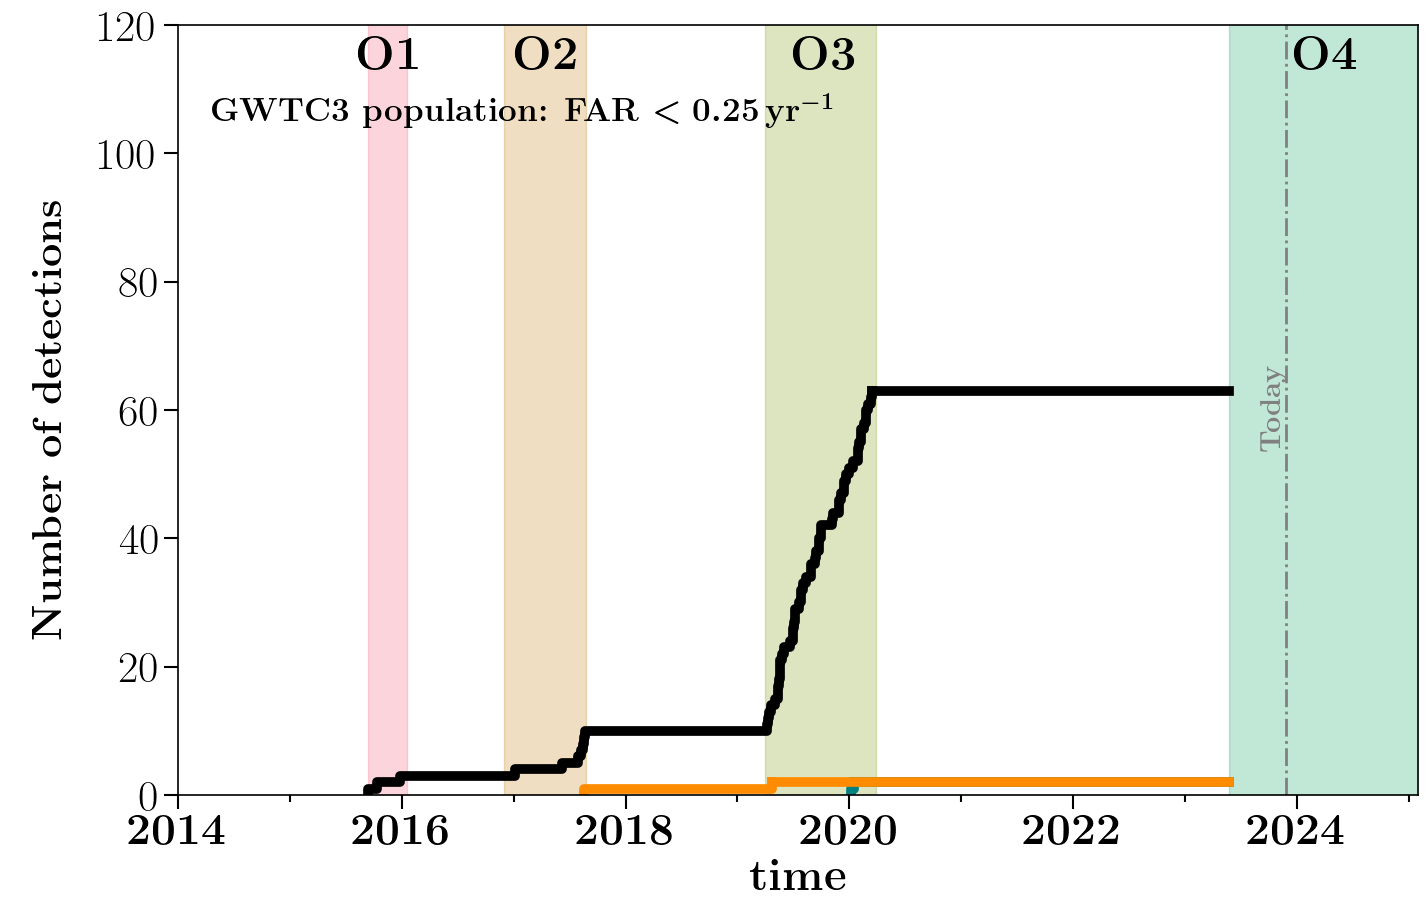

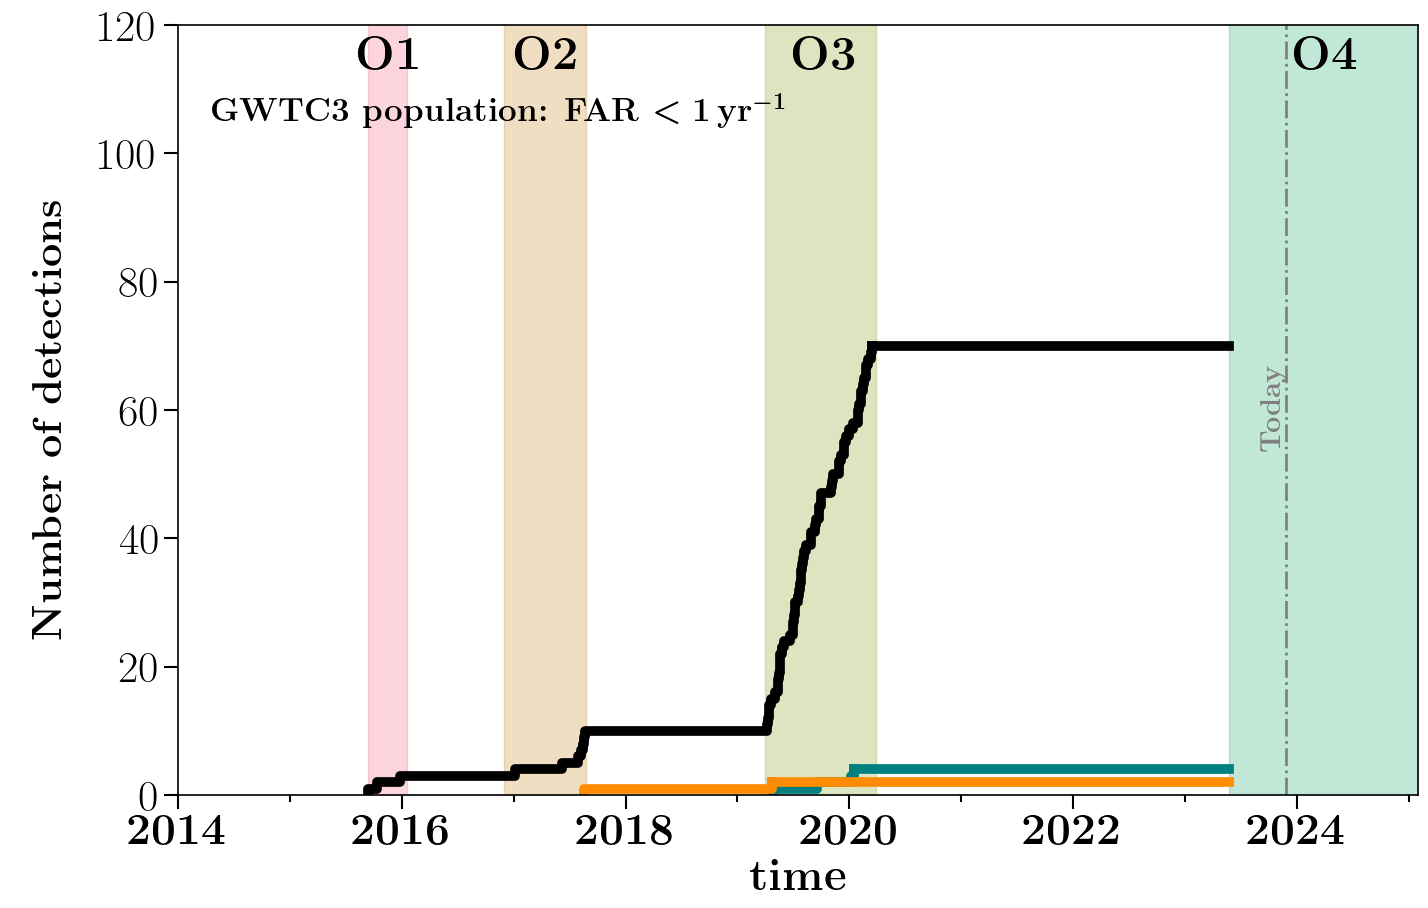

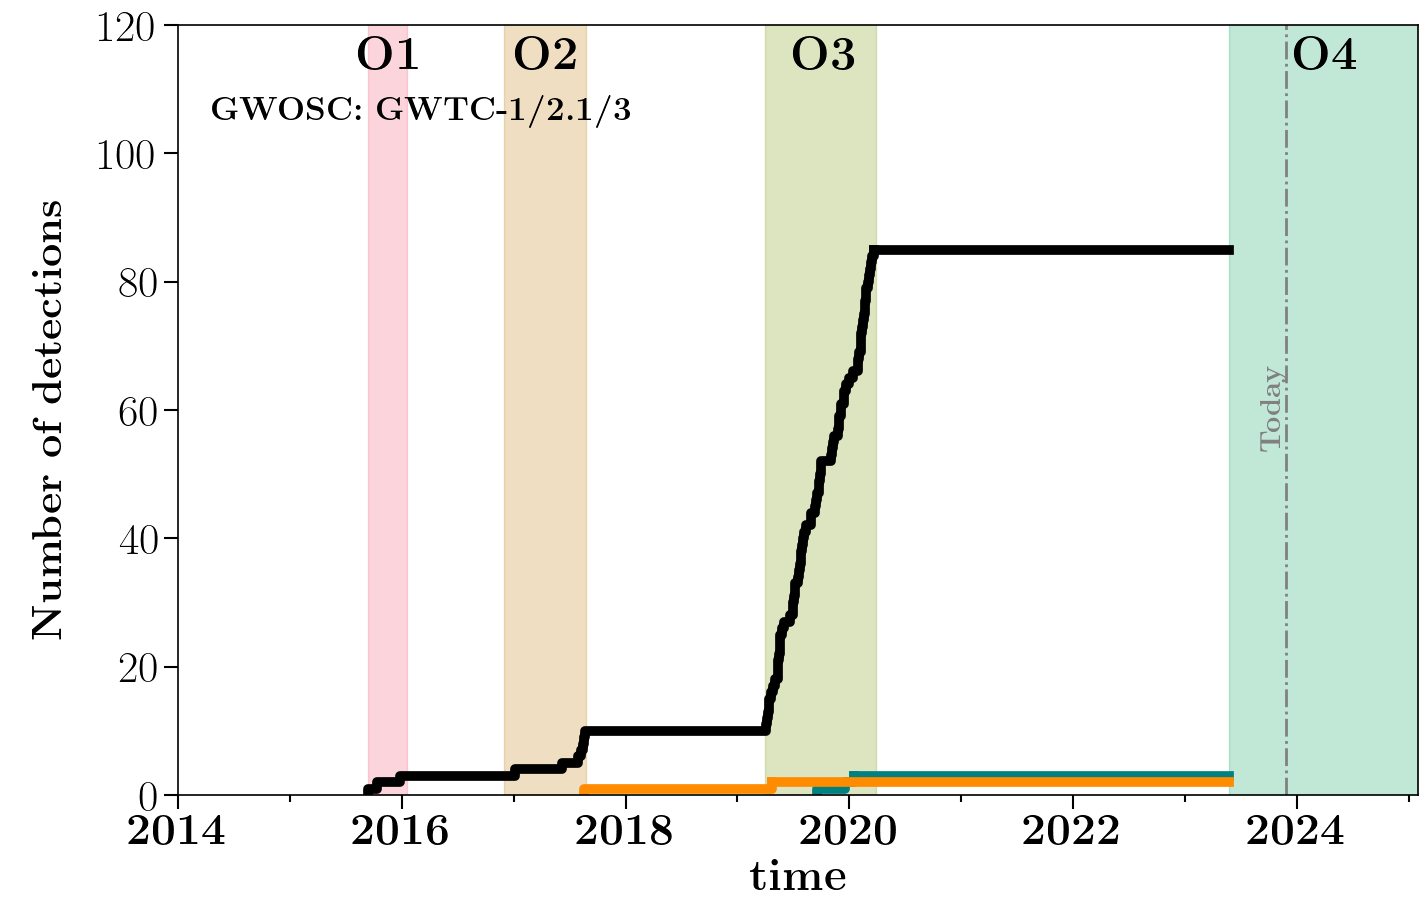

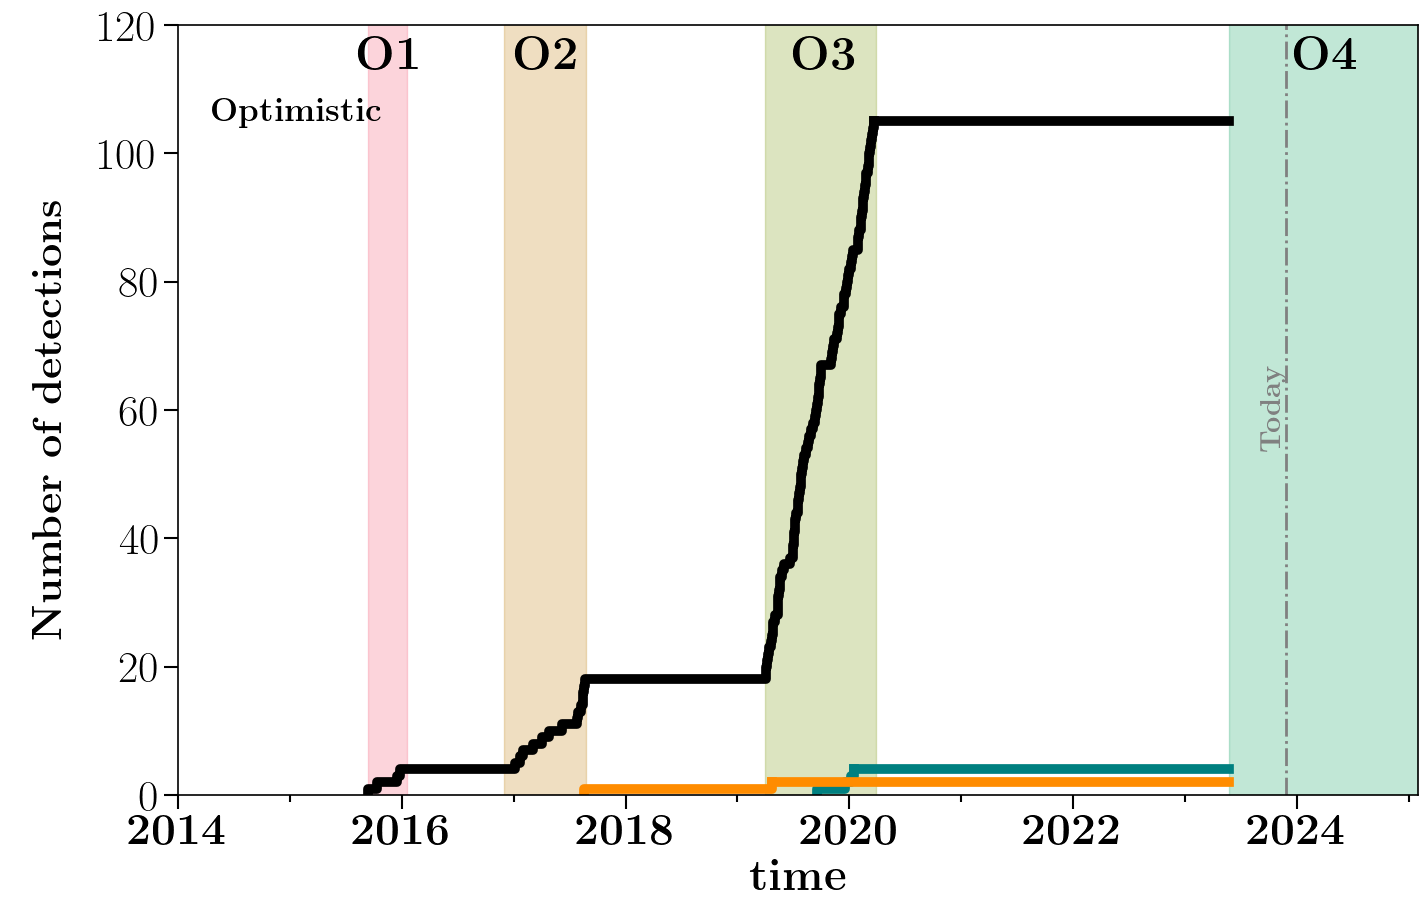

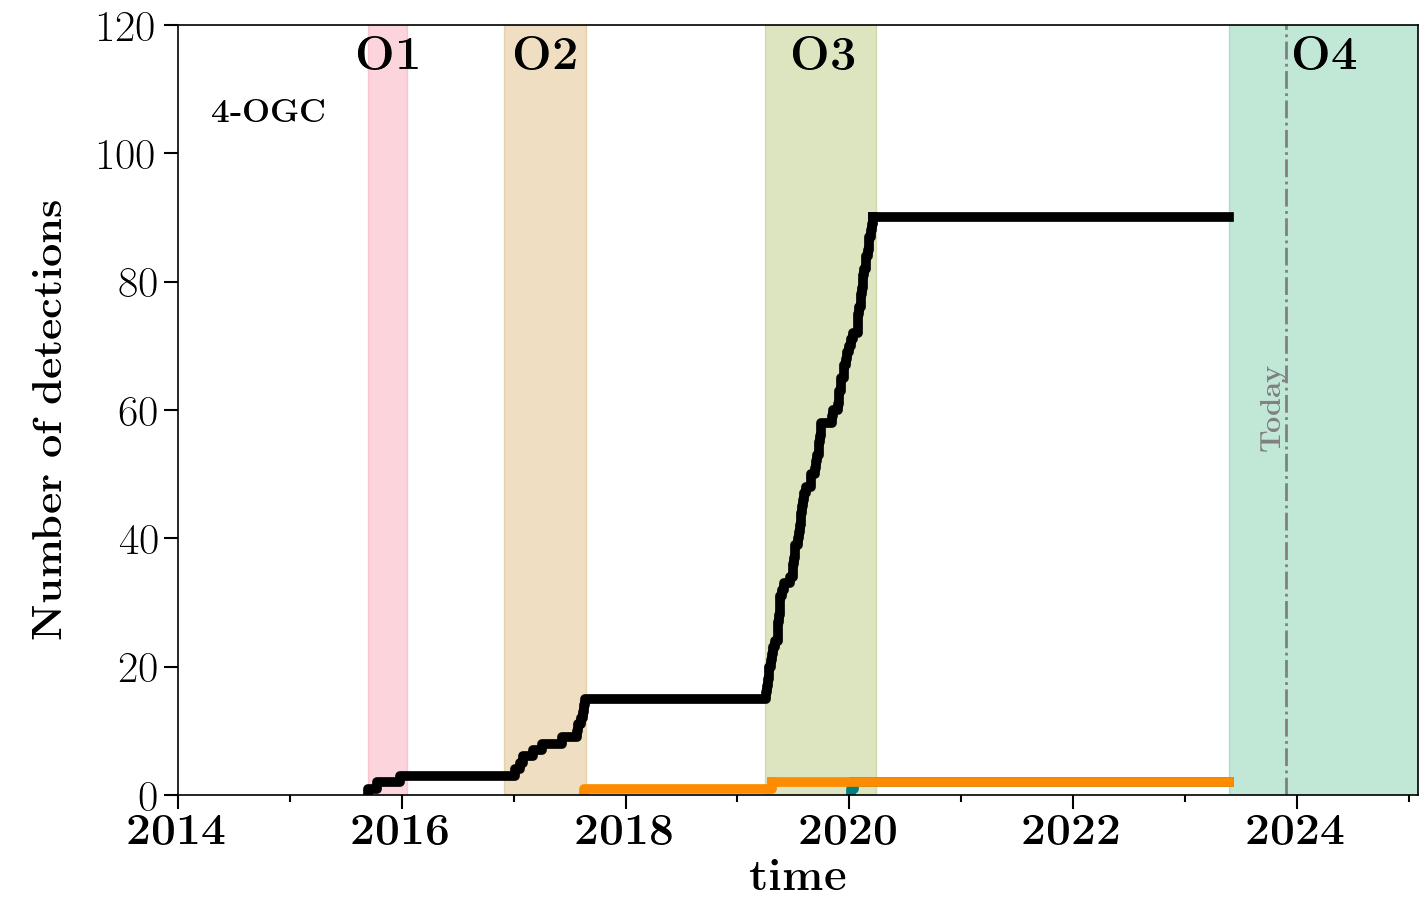

In [5]:



def make_figures_different_GWTC3_catalog(label_dataset='GWTC3_pop_far<0_25yr', label='GWTC3 FAR > 0.25 $\rm{yr}^{-1}$', no_label=0, print_output=False):


    making_movie=False
    DCOcolors = ['k',  'teal', 'darkorange'] 


    
    GW_events_list = create_GW_list_from_data(label_dataset=label_dataset, print_output=print_output)
    if print_output==True:
        print(GW_events_list )
    detectionlist = obtain_GW_datetimes(GW_events_list) 

    if making_movie:
        total = 400 
        folder_save = './GWcatalogMovie'
        enumerate_list = np.linspace(2015, datetime_today, total)
    else:
        folder_save = './GWcatalogFigures'
        enumerate_list = [datetime_today_perc]


    for ind_sy, stop_year in enumerate(enumerate_list):
        f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))

        y_max_all = []

        #### plots cumhist of past detections up to min(stop_year, O4begin) #####
        y_max_all = make_cumhist_past_detections(ax=axe, detectionlist=detectionlist, y_max_all=y_max_all, stop_year=stop_year, DCOcolors=DCOcolors, lw=7) 
        
        
        mask_stop_year = np.asarray(dates[:-1])< stop_year

        if np.sum(mask_stop_year)>=1:
            items_ind = len(np.asarray(dates[:-1])[mask_stop_year])
            for ind_d, line in enumerate(np.asarray(dates[:-1])[mask_stop_year]):
                continue 

        # update the max y-value, to scale the y-axis later 
        maxx_ = np.max(y_max_all)
        max_yvalue = np.max([5, maxx_])

        # fill between detector runs
        for ind_d, line in enumerate(all_dates[:-1]):
            if (ind_d%2)==0:
                axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.00, 0.00], y2=[10.5*max_yvalue,10.5*max_yvalue], alpha=0.3, color=colors[ind_d], zorder=0)

        ###### SHOW TODAY ########
        # uncomment the following four lines if you want to print a vertical line that shows where "today" is  
        x_today = np.linspace(datetime_today_perc, datetime_today_perc, 100)
        y_today = np.linspace(0, 5*1E6, 100)
        axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')
        axe.annotate(r'$\textbf{Today}$', (datetime_today_perc,0.5), xycoords=('data','figure fraction'),  fontsize=fs-3, rotation=90, ha='right', va='center', color='gray' )
        ###############

#         axe.set_ylim(0,1.1*max_yvalue) 
        axe.set_ylim(0,120)
        if stop_year<=2035:
            axe.yaxis.set_major_formatter('{x:,.0f}')
        else:
            axe.yaxis.set_major_formatter('{x:2,.0f}')

        # set up axis ticks 
        axe.xaxis.set_major_locator(plt.MultipleLocator(2))
        axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
        axe.set_xlim(2014, O4end)

        # plot the GW detector labels in the top
        plot_detector_labels_O4(axe=axe)

        xlabel =  r'\textbf{time}'
        axe = layoutAxes(axe, nameX=xlabel, nameY=None, setMinor=False, fontsize=fs+8)


        # add y-label, have to use annotate since otherwise alignment between frames is messed up 
        axe.annotate(r'$\textbf{Number of detections}$', (0.02,0.49), xycoords=('figure fraction','figure fraction'),  fontsize=fs+6, rotation=90, ha='left', va='center', color='k' )
    #     ylabel = r'\textbf{Number of detections}' # original ylabel name         



        # add credits, you can delete this 
#         axe.annotate(r'$\copyright \textbf{Floor Broekgaarden}$', (0.883,0.116), xycoords=('figure fraction','figure fraction'),  fontsize=fs-8, rotation=90, ha='right', va='bottom', color='k' )
        
        # which GWTC3 catalog 
        axe.annotate(r'$\textbf{%s }$'%label, (2014.3,0.78), xycoords=('data','figure fraction'),  fontsize=fs, rotation=0, ha='left', va='bottom', color='k' )
        
        # save to directory for making movie later. 
        if making_movie:
            plt.savefig(folder_save+'/knownDetectionsGWcatalogSize_%s.png'%ind_sy, dpi=100, transparent=False)
        
        else:
            plt.savefig(folder_save+'/knownDetectionsGWcatalogSize_%s.png'%no_label, dpi=100, transparent=False)
            
        plt.show() # this will create a *lot* of figures 
        plt.close()

make_figures_different_GWTC3_catalog(label_dataset='GWTC3_pop_far<0_25yr', label=r'GWTC3 population: FAR $< 0.25\, \rm{yr}^{-1}$', no_label=0)
make_figures_different_GWTC3_catalog(label_dataset='GWTC3_pop_far<1yr', label=r'GWTC3 population: FAR $< 1\, \rm{yr}^{-1}$', no_label=1, print_output=False)
make_figures_different_GWTC3_catalog(label_dataset='GWOSC', label=r'GWOSC: GWTC-1/2.1/3', no_label=2, print_output=False)
make_figures_different_GWTC3_catalog(label_dataset='GWOSC_plus_external', label=r'Optimistic', no_label=3)
make_figures_different_GWTC3_catalog(label_dataset='4-OGC', label=r'4-OGC', no_label=3)





## Plot as a function of time a figure with the different O1+O2+O3 detection cumhist. (You can then make a movie by combining the images )

In [6]:




def make_figures_different_GWTC3_catalog(axe, label_dataset='GWTC3_pop_far<0_25yr', label='GWTC3 FAR > 0.25 $\rm{yr}^{-1}$', no_label=0, enumerate_list=['0'], print_output=False):

    
    
    
    datasets = [ 'GWOSC_plus_external', '4-OGC', 'GWOSC', 'GWTC3_pop_far<1yr', 'GWTC3_pop_far<0_25yr']
    datasets_labels = [ r'$\textbf{Optimistic}$', r'$\textbf{4-OGC}$' , r'$\textbf{GWOSC (GWTC-1/2.1/3)}$',  r'$\textbf{GWTC3 pop} < 1 \rm{yr}^{-1}$ ' ,  r'$\textbf{GWTC3 pop} < 0.25 \rm{yr}^{-1}$ ' ]
    datasets_number_loc = [0.52, 0.47, 0.42, 0.37, 0.32]
    making_movie=False
    DCOcolors = ['k',  'teal', 'darkorange']  
    datasets_ls = ['-', ':', '-.', '--', '--']

    
    for ind_sy, stop_year in enumerate(enumerate_list):
        

        if print_output==True:
            print('at figure %s out of %s. Stopping this plot at year %s'%(ind_sy+1, total, stop_year))
        y_max_all = []
        
        
        for ind_dataset, label_dataset in enumerate(datasets):
            GW_events_list = create_GW_list_from_data(label_dataset=label_dataset)
            detectionlist = obtain_GW_datetimes(GW_events_list) 


            for ind_DCO, DCOdetections in enumerate(detectionlist):
                y_max = cumhist_stop_year(data=np.asarray(DCOdetections), ax=axe, c=DCOcolors[ind_DCO], lw=3, stop_year=stop_year, ls=datasets_ls[ind_dataset])
                y_max_all.append(y_max)


#               annotate labels for BHBH, BHNS, BNS
#                 if stop_year<2021:
                if ind_DCO==0:
                    axe.annotate(datasets_labels[ind_dataset], (2021.9, datasets_number_loc[ind_dataset]), xycoords=('data','figure fraction'),  fontsize=fs-7, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
                    axe.annotate(r'$%s$'%int(y_max), (2020.5, datasets_number_loc[ind_dataset]), xycoords=('data','figure fraction'),  fontsize=fs, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
                if ind_DCO==1:
                    axe.annotate(r'$%s$'%int(y_max), (2021.16, datasets_number_loc[ind_dataset]), xycoords=('data','figure fraction'),  fontsize=fs, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
                if ind_DCO==2:
                    axe.annotate(r'$%s$'%int(y_max), (2021.5, datasets_number_loc[ind_dataset]), xycoords=('data','figure fraction'),  fontsize=fs, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )


            # update the max y-value, to scale the y-axis later 
            max_yvalue = np.max([5, np.max(y_max_all)])

    return

  

#### start making video by making 'total' number of frames over time 

total = 400 
folder_save = './GWcatalogMovie'
movie_list = np.linspace(2015, 2025.05, total)    

for ind_m, enumerate_list in enumerate(movie_list[:] ):  

        
    f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))

    # fill between detector runs
    for ind_d, line in enumerate(all_dates[:-1]):
        if (ind_d%2)==0:
            axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.00, 0.00], y2=[10.5*200,10.5*200], alpha=0.3, color=colors[ind_d], zorder=0)

    ###### SHOW TODAY ########
    # # uncomment the following four lines if you want to print a vertical line that shows where "today" is  
    # x_today = np.linspace(datetime_today_perc, datetime_today_perc, 100)
    # y_today = np.linspace(0, 5*1E6, 100)
    # axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')
    # axe.annotate(r'$\textbf{Today}$', (datetime_today_perc,0.6), xycoords=('data','figure fraction'),  fontsize=fs-3, rotation=90, ha='right', va='center', color='gray' )
    # ###############

    axe.set_ylim(0,107)

    # set up axis ticks 
    axe.xaxis.set_major_locator(plt.MultipleLocator(2))
    axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axe.set_xlim(2014, 2025.05)

    # plot the GW detector labels in the top
    plot_detector_labels_O4(axe=axe)
    
    # set labels 
    xlabel =  r'\textbf{time}'
    axe = layoutAxes(axe, nameX=xlabel, nameY=None, setMinor=False, fontsize=fs+8)
    axe.annotate(r'$\textbf{Number of detections}$', (0.02,0.49), xycoords=('figure fraction','figure fraction'),  fontsize=fs+6, rotation=90, ha='left', va='center', color='k' ) ## add y-label, have to use annotate since otherwise alignment between frames might be messed up 

    # add credits 
#     axe.annotate(r'$\copyright \textbf{Floor Broekgaarden}$', (0.9,0.116), xycoords=('figure fraction','figure fraction'),  fontsize=fs-8, rotation=90, ha='right', va='bottom', color='k' )

    # annotate labels for BHBH, BHNS, BNS
    DCOcolors = ['k',  'teal', 'darkorange']  
    axe.annotate(r'$\textbf{BH-BH}$', (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
    axe.annotate(r'$\textbf{BH-NS}$', (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
    axe.annotate(r'$\textbf{NS-NS}$', (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )

    make_figures_different_GWTC3_catalog(axe,label_dataset='GWTC3_pop_far<0_25yr', label=r'GWTC3 population: FAR $< 0.25\, \rm{yr}^{-1}$', no_label=0, enumerate_list=[enumerate_list])
    plt.savefig(folder_save+'/knownDetectionsGWcatalogSizeMovie_%s.png'%ind_m, dpi=100, transparent=False)
#     plt.show() # this will create a *lot* of figures 
    plt.close()
    
print('done!')




done!


## Steps to make movie:  
adjust the python script makeMovie.py to point to your directory with GWcatalog images. (here it is /Users/floorbroekgaarden/Projects/GitHub/GW_visualization_detection_number/GWcatalogMovie) <br>
optional: you can also change the speed/time/number of frames and the name of the movie etc.  <br>
run the following code: <br>

```!python3 makeMovie.py``` 

 and making sure it runs this line: ```makeMovie_GWcatalogSize(fps=45, duration=40, name_images='knownDetectionsGWcatalogSizeMovie_')```


# Make a figure with future expected events

In [7]:
# Below is a really long code to define the detection number for future detectors. 
# I will make this more flexible one day :) 


# choose which one to start with (i.e. which O1+O2+O3 catalog to assume for the existing detections)
label_dataset = 'GWOSC'
print_output=False
GW_events_list = create_GW_list_from_data(label_dataset=label_dataset, print_output=print_output)
if print_output==True:
    print(GW_events_list )
detectionlist = obtain_GW_datetimes(GW_events_list) 

# numbers by the end of O3, will be used as ratio for O4, O5, Voyager 
N_BNS_O3, N_BHNS_O3, N_BBH_O3 = 2, 3, 85 # based on GWOSC population catalog (should be the same as label_dataset)
total_events = N_BNS_O3 + N_BHNS_O3 + N_BBH_O3

def relative_volume_number_increase(BNS_distance):
    """ calculates the relative volume increase compared to O3 based on BNS range"""
    O3_BNS_distance = 120 # Mpc 
    Increased_rate = (BNS_distance)**3/(O3_BNS_distance)**3
    
    
    return Increased_rate
    



    
uncertainty_factor=3   # what factor of uncertainty to add to O4, O5 and voyager rates 
    
## BBH 
O4_increased_rate = relative_volume_number_increase(175)
n_O4 = O4_increased_rate*50*0.7  # about 50 detections in O3-like per year , with 70% duty cycle
numberO3end = len(detectionlist[0]) # number BBHs at end of O3
numberO4end = numberO3end + n_O4*1.5 # O4 runs for 1.5 years
O5_increased_rate = relative_volume_number_increase(282.5)
n_O5 = O5_increased_rate*50*0.7  # per year 
numberO5end = numberO4end + n_O5*2  # O5 runs for 2 years 
numbersVoyend = numberO5end + 100*numberO3end  # based on the factor 100 compared to O3, from https://arxiv.org/pdf/2001.11173.pdf  
numbersCEend = numbersVoyend + 69610  * 5 # CE will detect about 60 000 events BBH per year, see https://arxiv.org/abs/2207.02771 , factor 5 for the timeline (that is already included in the other ones)
numbers_BBH = [numberO3end, numberO3end, numberO4end, numberO4end, numberO5end, numberO5end, numbersVoyend, numbersVoyend, numbersCEend, numbersCEend]


n_O4_up, n_O4_down = n_O4/uncertainty_factor, n_O4*uncertainty_factor
n_O5_up, n_O5_down = n_O5/uncertainty_factor, n_O5*uncertainty_factor
numberO3end = len(detectionlist[0]) # number BBHs at end of O3
numberO4end_up, numberO4end_down = numberO3end + n_O4_up*1.5, numberO3end + n_O4_down*1.5  # O4 has about twice as many BBHs as O3  (180 = 2x90)
numberO5end_up, numberO5end_down = numberO4end_up + 2*n_O5_up, numberO4end_down + 2*n_O5_down # O5 has about twice as many BBHs as O3  (180 = 2x90)
numbersVoyend_up, numbersVoyend_down = numberO5end_up + 50*n_O4_up, numberO5end_down + 50*n_O4_down # based on the factor 100 compared to O3, from https://arxiv.org/pdf/2001.11173.pdf  (which is a factor 50 compared to O4)
numbersCEend_up, numbersCEend_down = numbersVoyend_up + (3.1*1E4 * 5), numbersVoyend_down + (1.5*1E5 * 5) # from upper and lower values in Table 3 of visualization paper , factor 5 for the timeline (that is already included in the other ones)
numbers_BBH_up = [numberO3end, numberO3end, numberO4end_up, numberO4end_up, numberO5end_up, numberO5end_up, numbersVoyend_up, numbersVoyend_up, numbersCEend_up, numbersCEend_up]
numbers_BBH_down = [numberO3end, numberO3end, numberO4end_down, numberO4end_down, numberO5end_down, numberO5end_down, numbersVoyend_down, numbersVoyend_down, numbersCEend_down, numbersCEend_down]

## BHNS
fraction_BHNS =  N_BHNS_O3/total_events  
numberO3end = len(detectionlist[1]) # number BBHs at end of O3
numberO4end = numberO3end + n_O4*1.5*(fraction_BHNS)
numberO5end = numberO4end + n_O5*2*(fraction_BHNS)
numbersVoyend = numberO5end + 50*n_O4*(fraction_BHNS)
numbersCEend = numbersVoyend + 29462 * 5 # From ET+2CE in Table 4 https://arxiv.org/abs/2207.02771, factor 5 for a 5 year timeline 
numbers_BHNS = [numberO3end, numberO3end, numberO4end, numberO4end, numberO5end, numberO5end, numbersVoyend, numbersVoyend, numbersCEend, numbersCEend]

n_O4_up, n_O4_down = (n_O4/uncertainty_factor)*fraction_BHNS,(n_O4*uncertainty_factor)*fraction_BHNS# factor 1.5 for poisson uncertainty (50%)
n_O5_up, n_O5_down = fraction_BHNS*n_O5/uncertainty_factor, fraction_BHNS*n_O5*uncertainty_factor
# numberO3end = len(detectionlist[1]) # number BBHs at end of O3
numberO4end_up, numberO4end_down = numberO3end + n_O4_up*1.5, numberO3end + n_O4_down*1.5  # O4 has about twice as many BBHs as O3  (180 = 2x90)
numberO5end_up, numberO5end_down = numberO4end_up + n_O5_up*2, numberO4end_down + n_O5_down*2 # O5 has about twice as many BBHs as O3  (180 = 2x90)
numbersVoyend_up, numbersVoyend_down = numberO5end_up + 50*n_O4_up, numberO5end_down + 50*n_O4_down # based on the factor 100 compared to O3, from https://arxiv.org/pdf/2001.11173.pdf  (which is a factor 50 compared to O4)
numbersCEend_up, numbersCEend_down = numbersVoyend_up + (1.9*1E3* 5), numbersVoyend_down + (4.4*1E5 * 5) # from upper and lower ET+2CE limit from 5.3 in https://arxiv.org/abs/2207.02771 , factor 5 for the timeline (that is already included in the other ones)
numbers_BHNS_up = [numberO3end, numberO3end, numberO4end_up, numberO4end_up, numberO5end_up, numberO5end_up, numbersVoyend_up, numbersVoyend_up, numbersCEend_up, numbersCEend_up]
numbers_BHNS_down = [numberO3end, numberO3end, numberO4end_down, numberO4end_down, numberO5end_down, numberO5end_down, numbersVoyend_down, numbersVoyend_down, numbersCEend_down, numbersCEend_down]


## BNS 
fraction_BNS = N_BNS_O3/total_events  
numberO3end = len(detectionlist[2]) # number BBHs at end of O3
numberO4end = numberO3end + n_O4*1.5*(fraction_BNS)
numberO5end = numberO4end + n_O5*(fraction_BNS)*2
numbersVoyend = numberO5end + 50*n_O4*(fraction_BNS)
numbersCEend = numbersVoyend + 39584 * 5  # From ET+2CE in Table 4 https://arxiv.org/abs/2207.02771, factor 5 for a 5 year timeline 
numbers_BNS = [numberO3end, numberO3end, numberO4end, numberO4end, numberO5end, numberO5end, numbersVoyend, numbersVoyend, numbersCEend, numbersCEend]


n_O4_up, n_O4_down = (n_O4/uncertainty_factor)*fraction_BNS,(n_O4*uncertainty_factor)*fraction_BNS# factor 1.5 for poisson uncertainty (50%)
n_O5_up, n_O5_down = fraction_BNS*n_O5/uncertainty_factor, fraction_BNS*n_O5*uncertainty_factor
# numberO3end = len(detectionlist[2]) # number BBHs at end of O3
numberO4end_up, numberO4end_down = numberO3end + n_O4_up*1.5, numberO3end + n_O4_down*1.5  # O4 has about twice as many BBHs as O3  (180 = 2x90)
numberO5end_up, numberO5end_down = numberO4end_up + 2*n_O5_up, numberO4end_down + 2*n_O5_down # O5 has about twice as many BBHs as O3  (180 = 2x90)
numbersVoyend_up, numbersVoyend_down = numberO5end_up + 50*n_O4_up, numberO5end_down + 50*n_O4_down # based on the factor 100 compared to O3, from https://arxiv.org/pdf/2001.11173.pdf  (which is a factor 50 compared to O4)
numbersCEend_up, numbersCEend_down = numbersVoyend_up + (9.1*1E2 * 5), numbersVoyend_down + (1.2 * 1E6 * 5) # from upper and lower ET+2CE limit from 5.3 in https://arxiv.org/abs/2207.02771 , factor 5 for the timeline (that is already included in the other ones)
numbers_BNS_up = [numberO3end, numberO3end, numberO4end_up, numberO4end_up, numberO5end_up, numberO5end_up, numbersVoyend_up, numbersVoyend_up, numbersCEend_up, numbersCEend_up]
numbers_BNS_down = [numberO3end, numberO3end, numberO4end_down, numberO4end_down, numberO5end_down, numberO5end_down, numbersVoyend_down, numbersVoyend_down, numbersCEend_down, numbersCEend_down]




print('O4:',n_O4*1.5)
print('O5:', n_O5)






O4: 162.82823350694443
O5: 456.6460051359953


##  make a figure with all the confirmed and expected GW detections

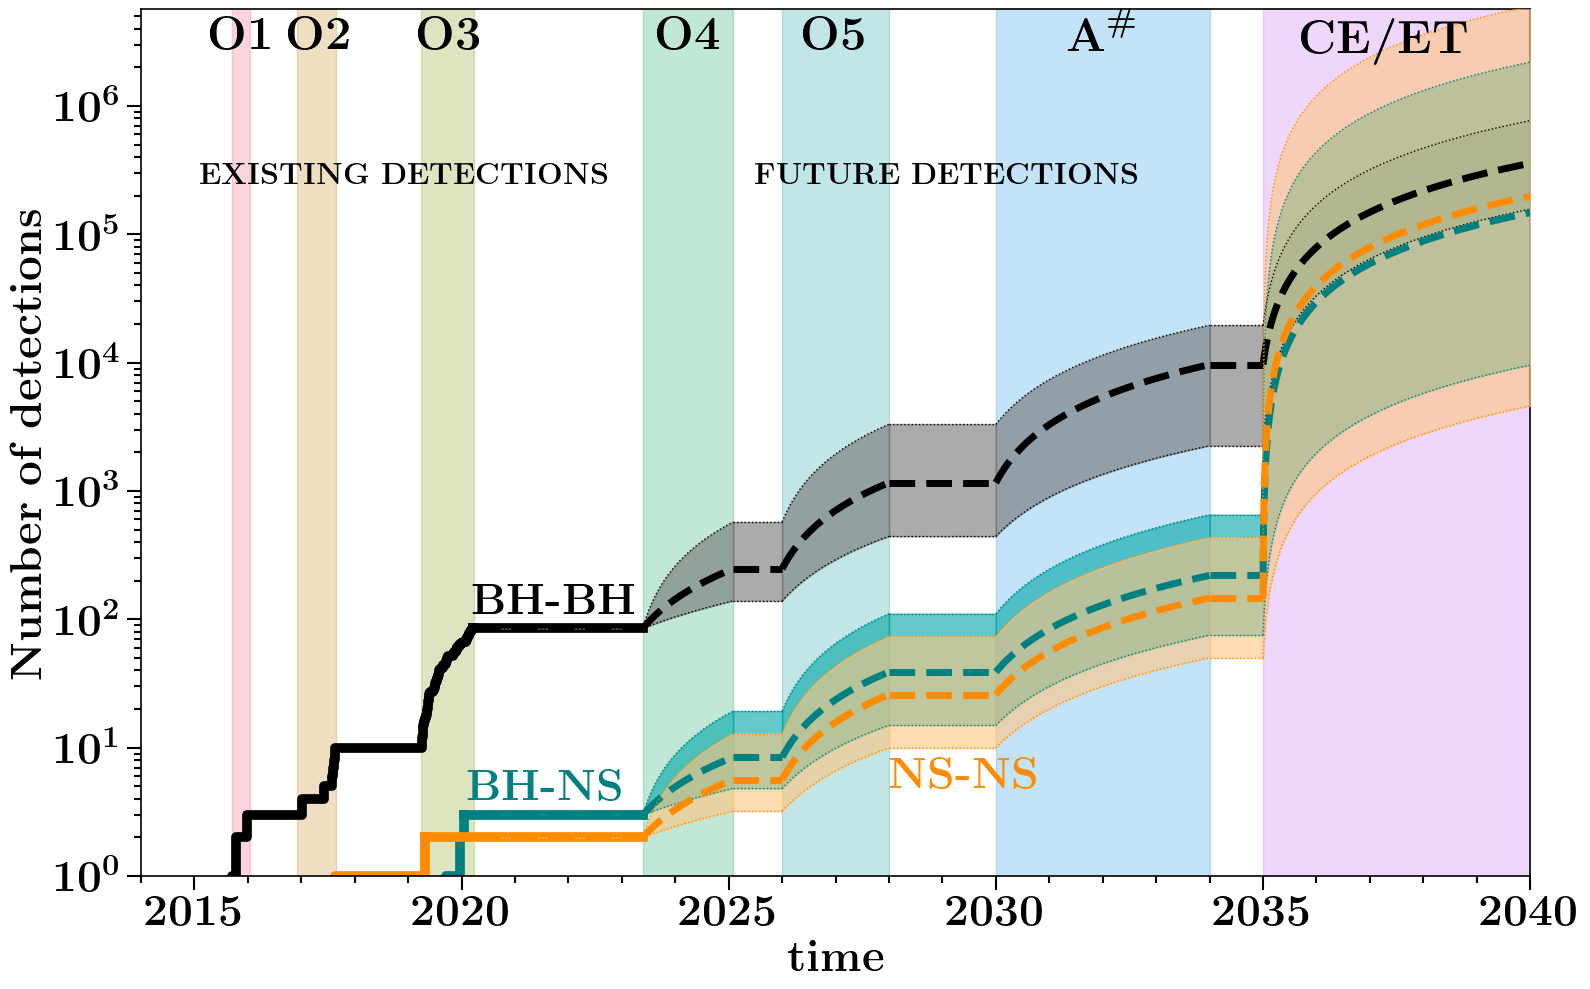

In [8]:



DCOcolors_lighter = [adjust_lightness(color='gray', amount=0.9),adjust_lightness(color=DCOcolors[1], amount=1.3), adjust_lightness(color=DCOcolors[2], amount=1.5)]


f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))

# DCO
DCOnumberslist = [numbers_BBH, numbers_BHNS, numbers_BNS]
DCOnumberslist_up = [numbers_BBH_up, numbers_BHNS_up, numbers_BNS_up]
DCOnumberslist_down = [numbers_BBH_down, numbers_BHNS_down, numbers_BNS_down]

plotUncertainty=True
print_phd_date=False #True # if True, will plot a vertical line for a given date (used for my PhD thesis)
print_today=False


for ind_DCO, DCOdetections in enumerate(detectionlist):
    cumhist_stop_year(data=np.asarray(DCOdetections), ax=axe, stop_year=O4begin, lw=7, c=DCOcolors[ind_DCO])
#     cumhist(data=np.asarray(DCOdetections), c=DCOcolors[ind_DCO], lw=7)


for ind_d, line in enumerate(dates[:-1]):
    x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
    
    for ind_DCO, DCOlist in enumerate(DCOnumberslist):
        y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
        axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=5, ls='--', zorder=10)
        
        if plotUncertainty:
            y_up = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
            y_down = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)

            axe.fill_between(x_, y1=y_down, y2=y_up, color=DCOcolors_lighter[ind_DCO], zorder=9, alpha=0.6)
            axe.plot(x_, y_down, c=DCOcolors[ind_DCO], lw=1, ls=':', zorder=10)
            axe.plot(x_, y_up, c=DCOcolors[ind_DCO], lw=1, ls=':', zorder=10)        
        
# fill between detector runs
for ind_d, line in enumerate(all_dates[:-1]):
    if (ind_d%2)==0:
        axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.001, 0.001], y2=[1E8,1E8], alpha=0.3, color=colors[ind_d], zorder=0)
    


    

if print_phd_date:
    ########## print line of Floor's PhD defense##########
    # days passed since beginning of year
    d0 = date(2023, 1, 1)
    d1 = date(2023, 4, 24)
    delta = d1 - d0
    # find phd day, use -1 to correct for that it starts at 0 
    phd_day = 2023  + (delta.days-1)/356.
    x_today = np.linspace(phd_day, phd_day, 100)
    y_today = np.linspace(1, 10*1E6, 100)
    axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')
    axe.annotate(r'$\textbf{PhD defense}$', (phd_day,1E4),  fontsize=fs-8, rotation=90, ha='right', va='center', color='gray' )


if print_today:
    ###### SHOW TODAY ########
    # uncomment the following four lines if you want to print a vertical line that shows where "today" is  
    x_today = np.linspace(datetime_today_perc, datetime_today_perc, 100)
    y_today = np.linspace(0, 5*1E6, 100)
    axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')
    axe.annotate(r'$\textbf{Today}$', (datetime_today_perc,0.5), xycoords=('data','figure fraction'),  fontsize=fs-3, rotation=90, ha='right', va='center', color='gray' )
    ###############


    
axe.set_ylim(1,5.7*1E6)    
axe.set_yscale('log')

axe.xaxis.set_major_locator(plt.MultipleLocator(5))
axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
axe.set_xlim(2014, 2040)

# plot the GW detector labels in the top
plot_detector_labels(axe=axe)

xlabel =  r'\textbf{time}'
ylabel = r'\textbf{Number of detections}'
axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=fs+8)


# annotate labels for BHBH, BHNS, BNS
axe.annotate(r'$\textbf{BH-BH}$', (2020.2,0.367), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
axe.annotate(r'$\textbf{BH-NS}$', (2020.1,0.18),  xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
axe.annotate(r'$\textbf{NS-NS}$', (2028.0,0.192 ),  xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )

axe.annotate(r'$\textbf{EXISTING DETECTIONS}$',   (2015.1,0.8), xycoords=('data','figure fraction'),  fontsize=fs-2, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
axe.annotate(r'$\textbf{FUTURE DETECTIONS}$'  ,   (2025.5,0.8), xycoords=('data','figure fraction'),  fontsize=fs-2, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )




plt.tight_layout()
if print_phd_date:
    plt.savefig('./GWcatalogSize_thesis.png', dpi=600, transparent=False)
    plt.savefig('./GWcatalogSize_thesis.pdf', transparent=False)    
else:
    plt.savefig('./GWcatalogSize.png', dpi=600, transparent=False)
    plt.savefig('./GWcatalogSize.pdf', transparent=False) 



plt.show()



# make plots for movie

## Linear scale without Uncertainty:

In [9]:

plotUncertainty=False
print_output= False


total = 200 
# for ind_sy, stop_year in enumerate([2025, 2030, 2040]):
for ind_sy, stop_year in enumerate(np.linspace(2015, 2040, total)):
    f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))

    if print_output==True:
        print('at figure %s out of %s. Stopping this plot at year %s'%(ind_sy+1, total, stop_year))

    y_max_all = []
    
    for ind_DCO, DCOdetections in enumerate(detectionlist):
        y_max = cumhist_stop_year(data=np.asarray(DCOdetections), ax=axe, c=DCOcolors[ind_DCO], lw=7, stop_year=stop_year)
        y_max_all.append(y_max)

        if stop_year<2021:
            if ind_DCO==0:
                axe.annotate(r'$\textbf{BH-BH: } %s$'%int(y_max), (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
            if ind_DCO==1:
                axe.annotate(r'$\textbf{BH-NS: } %s$'%int(y_max), (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
            if ind_DCO==2:
                axe.annotate(r'$\textbf{NS-NS: } %s$'%int(y_max), (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )


    mask_stop_year = np.asarray(dates[:-1])< stop_year

    if np.sum(mask_stop_year)>=1:
        items_ind = len(np.asarray(dates[:-1])[mask_stop_year])
        for ind_d, line in enumerate(np.asarray(dates[:-1])[mask_stop_year]):
            

            for ind_DCO, DCOlist in enumerate(DCOnumberslist):
                
                # if we are only plotting the partial line, because we stop plot before end of line
                # then calculate the slope, and the line begin and end points
                if ind_d+1==items_ind:
                    x_ = np.linspace(dates[ind_d], stop_year, 1000)
                    dy_rate = (DCOlist[ind_d+1]-DCOlist[ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                    dy = dy_rate * (stop_year-dates[ind_d])
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d]+dy, 1000)
                
                
                    if plotUncertainty:
    #                     x_ = np.linspace(dates[ind_d], stop_year, 1000)
                        dy_rate = (DCOnumberslist_up[ind_DCO][ind_d+1]-DCOnumberslist_up[ind_DCO][ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                        dy = dy_rate * (stop_year-dates[ind_d])
                        y_up = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d]+dy, 1000)
                        del dy_rate
                        del dy 

                        dy_rate = (DCOnumberslist_down[ind_DCO][ind_d+1]-DCOnumberslist_down[ind_DCO][ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                        dy = dy_rate * (stop_year-dates[ind_d])
                        y_down = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d]+dy, 1000)                    
                        del dy_rate
                        del dy 
                    
                # otherwise just plot the whole line 
                else:
                    x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
                
                    if plotUncertainty:
                        y_up = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
                        y_down = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)
                    
                
                # we know the data before today is 100% real, so show for all date before today a solid line
                mask_dates_before_today = (x_<=datetime_today_perc)
                axe.plot(x_[mask_dates_before_today], y_[mask_dates_before_today], c=DCOcolors[ind_DCO], lw=7, ls='-', zorder=10)
                # now plot the remaining rate
                axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=5, ls='--', zorder=10)
                # add the uncertainty
                if plotUncertainty:
                    axe.fill_between(x_, y1=y_down, y2=y_up, color=DCOcolors_lighter[ind_DCO], zorder=9, alpha=0.8)
                
                
                y_max_all.append(y_[-1])


                
                
                if line == np.asarray(dates[:-1])[mask_stop_year][-1]:
                    # annotate labels for BHBH, BHNS, BNS
                    if ind_DCO==0:
                        axe.annotate(r'$\textbf{BH-BH: } %s$'%int(y_[-1]), (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
                    if ind_DCO==1:
                        axe.annotate(r'$\textbf{BH-NS: } %s$'%int(y_[-1]), (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
                    if ind_DCO==2:
                        axe.annotate(r'$\textbf{NS-NS: } %s$'%int(y_[-1]), (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )

    
            
        ## fix BNS disconecction due to no detections 
        xx = np.linspace(2019.4, 2020.5, 10)
        yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[2], lw=7, ls='-', zorder=1)
        
        ## fix BHNS disconecction due to no detections 
        xx = np.linspace(2020.2, 2020.5, 10)
        yy = np.linspace(numbers_BHNS[0], numbers_BHNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[1], lw=7, ls='-', zorder=1)
      
        
    # update the max y-value, to scale the y-axis later 
    maxx_ = np.max(y_max_all)
    max_yvalue = np.max([5, maxx_])


    # fill between detector runs
    for ind_d, line in enumerate(all_dates[:-1]):
        if (ind_d%2)==0:
            axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.00, 0.00], y2=[1.5*max_yvalue,1.5*max_yvalue], alpha=0.3, color=colors[ind_d], zorder=0)

    ###### SHOW TODAY ########
    # uncomment the following four lines if you want to print a vertical line that shows where "today" is  
#     x_today = np.linspace(today, today, 100)
#     y_today = np.linspace(0, 5*1E6, 100)
#     axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')
#     axe.annotate(r'$\textbf{Today}$', (today,0.6), xycoords=('data','figure fraction'),  fontsize=fs-3, rotation=90, ha='right', va='center', color='gray' )
    ################

    axe.set_ylim(0,1.1*max_yvalue)    
    if stop_year<=2035:
        axe.yaxis.set_major_formatter('{x:,.0f}')
    else:
        axe.yaxis.set_major_formatter('{x:2,.0f}')

    # set up axis ticks 
    axe.xaxis.set_major_locator(plt.MultipleLocator(5))
    axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axe.set_xlim(2014, 2040)

    # plot the GW detector labels in the top
    plot_detector_labels(axe=axe)
    
    xlabel =  r'\textbf{time}'
    axe = layoutAxes(axe, nameX=xlabel, nameY=None, setMinor=False, fontsize=fs+8)

#     # annotate labels for BHBH, BHNS, BNS
#     axe.annotate(r'$\textbf{BH-BH}$', (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
#     axe.annotate(r'$\textbf{BH-NS}$', (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
#     axe.annotate(r'$\textbf{NS-NS}$', (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )
    
    # add y-label, have to use annotate since otherwise alignment between frames is messed up 
    axe.annotate(r'$\#\textbf{Events}$', (0.010,0.88), xycoords=('figure fraction','figure fraction'),  fontsize=fs+6, rotation=0, ha='left', va='center', color='k' )
#     ylabel = r'\textbf{Number of detections}' # original ylabel name         

    # add credits 
#     axe.annotate(r'$\copyright \textbf{Floor Broekgaarden}$', (0.895,0.114), xycoords=('figure fraction','figure fraction'),  fontsize=fs-10, rotation=0, ha='right', va='bottom', color='k' )

    # save to directory for making movie later. 
    plt.savefig('./GWcatalogMovie/GWcatalogSize_withUpdatedCE_%s.png'%ind_sy, dpi=100, transparent=False)
#     plt.show() # this will create a *lot* of figures 
    plt.close()

print('done with creating plots for movie')


done with creating plots for movie


## Log y-scale With Uncertainty 


In [10]:


plotUncertainty=True
print_output=False


total = 200 
# for ind_sy, stop_year in enumerate([2025, 2030, 2040]):
for ind_sy, stop_year in enumerate(np.linspace(2015, 2040, total)):
    f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))

    if print_output==True:
        print('at figure %s out of %s. Stopping this plot at year %s'%(ind_sy+1, total, stop_year))

    y_max_all = []
    
    for ind_DCO, DCOdetections in enumerate(detectionlist):
        y_max = cumhist_stop_year(data=np.asarray(DCOdetections), ax=axe, c=DCOcolors[ind_DCO], lw=7, stop_year=stop_year)
        y_max_all.append(y_max)

        if stop_year<2021:
            if ind_DCO==0:
                axe.annotate(r'$\textbf{BH-BH: } %s$'%int(y_max), (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
            if ind_DCO==1:
                axe.annotate(r'$\textbf{BH-NS: } %s$'%int(y_max), (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
            if ind_DCO==2:
                axe.annotate(r'$\textbf{NS-NS: } %s$'%int(y_max), (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )


    mask_stop_year = np.asarray(dates[:-1])< stop_year

    if np.sum(mask_stop_year)>=1:
        items_ind = len(np.asarray(dates[:-1])[mask_stop_year])
        for ind_d, line in enumerate(np.asarray(dates[:-1])[mask_stop_year]):
            

            for ind_DCO, DCOlist in enumerate(DCOnumberslist):
                
                # if we are only plotting the partial line, because we stop plot before end of line
                # then calculate the slope, and the line begin and end points
                if ind_d+1==items_ind:
                    x_ = np.linspace(dates[ind_d], stop_year, 1000)
                    dy_rate = (DCOlist[ind_d+1]-DCOlist[ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                    dy = dy_rate * (stop_year-dates[ind_d])
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d]+dy, 1000)
                
                
                    if plotUncertainty:
    #                     x_ = np.linspace(dates[ind_d], stop_year, 1000)
                        dy_rate = (DCOnumberslist_up[ind_DCO][ind_d+1]-DCOnumberslist_up[ind_DCO][ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                        dy = dy_rate * (stop_year-dates[ind_d])
                        y_up = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d]+dy, 1000)
                        del dy_rate
                        del dy 

                        dy_rate = (DCOnumberslist_down[ind_DCO][ind_d+1]-DCOnumberslist_down[ind_DCO][ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                        dy = dy_rate * (stop_year-dates[ind_d])
                        y_down = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d]+dy, 1000)                    
                        del dy_rate
                        del dy 
                    
                # otherwise just plot the whole line 
                else:
                    x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
                
                    if plotUncertainty:
                        y_up = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
                        y_down = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)
                    
                
                # we know the data before today is 100% real, so show for all date before today a solid line
                mask_dates_before_today = (x_<=datetime_today_perc)
                axe.plot(x_[mask_dates_before_today], y_[mask_dates_before_today], c=DCOcolors[ind_DCO], lw=7, ls='-', zorder=10)
                # now plot the remaining rate
                axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=5, ls='--', zorder=10)
                # add the uncertainty
                if plotUncertainty:
                    axe.fill_between(x_, y1=y_down, y2=y_up, color=DCOcolors_lighter[ind_DCO], zorder=9, alpha=0.6)
                    axe.plot(x_, y_down, c=DCOcolors[ind_DCO], lw=1, ls=':', zorder=10)
                    axe.plot(x_, y_up, c=DCOcolors[ind_DCO], lw=1, ls=':', zorder=10)
                
                y_max_all.append(y_[-1])
                if plotUncertainty:
                    y_max_all.append(y_down[-1])


                
                
                if line == np.asarray(dates[:-1])[mask_stop_year][-1]:
                    # annotate labels for BHBH, BHNS, BNS
                    if ind_DCO==0:
                        axe.annotate(r'$\textbf{BH-BH: } %s$'%int(y_[-1]), (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
                    if ind_DCO==1:
                        axe.annotate(r'$\textbf{BH-NS: } %s$'%int(y_[-1]), (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
                    if ind_DCO==2:
                        axe.annotate(r'$\textbf{NS-NS: } %s$'%int(y_[-1]), (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )

    
            
        ## fix BNS disconecction due to no detections 
        xx = np.linspace(2019.4, 2020.5, 10)
        yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[2], lw=7, ls='-', zorder=1)
        
        ## fix BHNS disconecction due to no detections 
        xx = np.linspace(2020.2, 2020.5, 10)
        yy = np.linspace(numbers_BHNS[0], numbers_BHNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[1], lw=7, ls='-', zorder=1)
      
        
    # update the max y-value, to scale the y-axis later 
    maxx_ = np.max(y_max_all)
    max_yvalue = np.max([5, maxx_])


    # fill between detector runs
    for ind_d, line in enumerate(all_dates[:-1]):
        if (ind_d%2)==0:
            axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.00, 0.00], y2=[2.5*max_yvalue,2.5*max_yvalue], alpha=0.3, color=colors[ind_d], zorder=0)

    ###### SHOW TODAY ########
    # uncomment the following four lines if you want to print a vertical line that shows where "today" is  
#     x_today = np.linspace(today, today, 100)
#     y_today = np.linspace(0, 5*1E6, 100)
#     axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')
#     axe.annotate(r'$\textbf{Today}$', (today,0.6), xycoords=('data','figure fraction'),  fontsize=fs-3, rotation=90, ha='right', va='center', color='gray' )
    ################

    axe.set_ylim(0.99,1.5*max_yvalue)    
    if stop_year<=2035:
        axe.yaxis.set_major_formatter('{x:,.0f}')
    else:
        axe.yaxis.set_major_formatter('{x:2,.0f}')

    # set up axis ticks 
    axe.xaxis.set_major_locator(plt.MultipleLocator(5))
    axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axe.set_xlim(2014, 2040)

    # plot the GW detector labels in the top
    plot_detector_labels(axe=axe)
    
    xlabel =  r'\textbf{time}'
    axe = layoutAxes(axe, nameX=xlabel, nameY=None, setMinor=False, fontsize=fs+8)
    axe.set_yscale('log')
#     # annotate labels for BHBH, BHNS, BNS
#     axe.annotate(r'$\textbf{BH-BH}$', (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
#     axe.annotate(r'$\textbf{BH-NS}$', (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
#     axe.annotate(r'$\textbf{NS-NS}$', (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )
    
    # add y-label, have to use annotate since otherwise alignment between frames is messed up 
    axe.annotate(r'$\#\textbf{Events}$', (0.010,0.88), xycoords=('figure fraction','figure fraction'),  fontsize=fs+3, rotation=0, ha='left', va='center', color='k' )
#     ylabel = r'\textbf{Number of detections}' # original ylabel name         

    # add credits 
#     axe.annotate(r'$\copyright \textbf{Floor Broekgaarden}$', (0.895,0.114), xycoords=('figure fraction','figure fraction'),  fontsize=fs-10, rotation=0, ha='right', va='bottom', color='k' )

    # save to directory for making movie later. 
    plt.savefig('./GWcatalogMovie/GWcatalogSize_withUncertainty_%s.png'%ind_sy, dpi=100, transparent=False)
#     plt.show() # this will create a *lot* of figures 
    plt.close()

print('done: saved all the plots at different times to make a video in the directory')




done: saved all the plots at different times to make a video in the directory


# Linear y-scale with uncertainty 

In [11]:

plotUncertainty=True
print_output=False


total = 200 
# for ind_sy, stop_year in enumerate([2025, 2030, 2040]):
for ind_sy, stop_year in enumerate(np.linspace(2015, 2040, total)):
    f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))

    if print_output==True:
        print('at figure %s out of %s. Stopping this plot at year %s'%(ind_sy+1, total, stop_year))

    y_max_all = []
    
    for ind_DCO, DCOdetections in enumerate(detectionlist):
        y_max = cumhist_stop_year(data=np.asarray(DCOdetections), ax=axe, c=DCOcolors[ind_DCO], lw=7, stop_year=stop_year)
        y_max_all.append(y_max)

        if stop_year<2021:
            if ind_DCO==0:
                axe.annotate(r'$\textbf{BH-BH: } %s$'%int(y_max), (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
            if ind_DCO==1:
                axe.annotate(r'$\textbf{BH-NS: } %s$'%int(y_max), (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
            if ind_DCO==2:
                axe.annotate(r'$\textbf{NS-NS: } %s$'%int(y_max), (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )


    mask_stop_year = np.asarray(dates[:-1])< stop_year

    if np.sum(mask_stop_year)>=1:
        items_ind = len(np.asarray(dates[:-1])[mask_stop_year])
        for ind_d, line in enumerate(np.asarray(dates[:-1])[mask_stop_year]):
            

            for ind_DCO, DCOlist in enumerate(DCOnumberslist):
                
                # if we are only plotting the partial line, because we stop plot before end of line
                # then calculate the slope, and the line begin and end points
                if ind_d+1==items_ind:
                    x_ = np.linspace(dates[ind_d], stop_year, 1000)
                    dy_rate = (DCOlist[ind_d+1]-DCOlist[ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                    dy = dy_rate * (stop_year-dates[ind_d])
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d]+dy, 1000)
                
                
                    if plotUncertainty:
    #                     x_ = np.linspace(dates[ind_d], stop_year, 1000)
                        dy_rate = (DCOnumberslist_up[ind_DCO][ind_d+1]-DCOnumberslist_up[ind_DCO][ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                        dy = dy_rate * (stop_year-dates[ind_d])
                        y_up = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d]+dy, 1000)
                        del dy_rate
                        del dy 

                        dy_rate = (DCOnumberslist_down[ind_DCO][ind_d+1]-DCOnumberslist_down[ind_DCO][ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                        dy = dy_rate * (stop_year-dates[ind_d])
                        y_down = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d]+dy, 1000)                    
                        del dy_rate
                        del dy 
                    
                # otherwise just plot the whole line 
                else:
                    x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
                
                    if plotUncertainty:
                        y_up = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
                        y_down = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)
                    
                
                # we know the data before today is 100% real, so show for all date before today a solid line
                mask_dates_before_today = (x_<=datetime_today_perc)
                axe.plot(x_[mask_dates_before_today], y_[mask_dates_before_today], c=DCOcolors[ind_DCO], lw=7, ls='-', zorder=10)
                # now plot the remaining rate
                axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=5, ls='--', zorder=10)
                # add the uncertainty
                if plotUncertainty:
                    axe.fill_between(x_, y1=y_down, y2=y_up, color=DCOcolors_lighter[ind_DCO], zorder=9, alpha=0.8)
                
                
                y_max_all.append(y_[-1])


                
                
                if line == np.asarray(dates[:-1])[mask_stop_year][-1]:
                    # annotate labels for BHBH, BHNS, BNS
                    if ind_DCO==0:
                        axe.annotate(r'$\textbf{BH-BH: } %s$'%int(y_[-1]), (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
                    if ind_DCO==1:
                        axe.annotate(r'$\textbf{BH-NS: } %s$'%int(y_[-1]), (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
                    if ind_DCO==2:
                        axe.annotate(r'$\textbf{NS-NS: } %s$'%int(y_[-1]), (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )

    
            
        ## fix BNS disconecction due to no detections 
        xx = np.linspace(2019.4, 2020.5, 10)
        yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[2], lw=7, ls='-', zorder=1)
        
        ## fix BHNS disconecction due to no detections 
        xx = np.linspace(2020.2, 2020.5, 10)
        yy = np.linspace(numbers_BHNS[0], numbers_BHNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[1], lw=7, ls='-', zorder=1)
      
        
    # update the max y-value, to scale the y-axis later 
    maxx_ = np.max(y_max_all)
    max_yvalue = np.max([5, maxx_])


    # fill between detector runs
    for ind_d, line in enumerate(all_dates[:-1]):
        if (ind_d%2)==0:
            axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.00, 0.00], y2=[1.5*max_yvalue,1.5*max_yvalue], alpha=0.3, color=colors[ind_d], zorder=0)

    ###### SHOW TODAY ########
    # uncomment the following four lines if you want to print a vertical line that shows where "today" is  
#     x_today = np.linspace(today, today, 100)
#     y_today = np.linspace(0, 5*1E6, 100)
#     axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')
#     axe.annotate(r'$\textbf{Today}$', (today,0.6), xycoords=('data','figure fraction'),  fontsize=fs-3, rotation=90, ha='right', va='center', color='gray' )
    ################

    axe.set_ylim(0,1.1*max_yvalue)    
    if stop_year<=2035:
        axe.yaxis.set_major_formatter('{x:,.0f}')
    else:
        axe.yaxis.set_major_formatter('{x:2,.0f}')

    # set up axis ticks 
    axe.xaxis.set_major_locator(plt.MultipleLocator(5))
    axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axe.set_xlim(2014, 2040)

    # plot the GW detector labels in the top
    plot_detector_labels(axe=axe)
    
    xlabel =  r'\textbf{time}'
    axe = layoutAxes(axe, nameX=xlabel, nameY=None, setMinor=False, fontsize=fs+8)

#     # annotate labels for BHBH, BHNS, BNS
#     axe.annotate(r'$\textbf{BH-BH}$', (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
#     axe.annotate(r'$\textbf{BH-NS}$', (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
#     axe.annotate(r'$\textbf{NS-NS}$', (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )
    
    # add y-label, have to use annotate since otherwise alignment between frames is messed up 
    axe.annotate(r'$\#\textbf{Events}$', (0.010,0.88), xycoords=('figure fraction','figure fraction'),  fontsize=fs+6, rotation=0, ha='left', va='center', color='k' )
#     ylabel = r'\textbf{Number of detections}' # original ylabel name         

    # add credits 
#     axe.annotate(r'$\copyright \textbf{Floor Broekgaarden}$', (0.895,0.114), xycoords=('figure fraction','figure fraction'),  fontsize=fs-10, rotation=0, ha='right', va='bottom', color='k' )

    # save to directory for making movie later. 
    plt.savefig('./GWcatalogMovie/GWcatalogSize_UncertaintyLin_%s.png'%ind_sy, dpi=100, transparent=False)
#     plt.show() # this will create a *lot* of figures 
    plt.close()



In [12]:
! python3 makeMovie.py

Moviepy - Building video /Users/floorbroekgaarden/Projects/GitHub/GW_visualization_detection_number/GWcatalogMovie/movie_knownDetectionsGWcatalogSizeMovie_.mp4.
Moviepy - Writing video /Users/floorbroekgaarden/Projects/GitHub/GW_visualization_detection_number/GWcatalogMovie/movie_knownDetectionsGWcatalogSizeMovie_.mp4

Moviepy - Done !                                                                
Moviepy - video ready /Users/floorbroekgaarden/Projects/GitHub/GW_visualization_detection_number/GWcatalogMovie/movie_knownDetectionsGWcatalogSizeMovie_.mp4
done
Moviepy - Building video /Users/floorbroekgaarden/Projects/GitHub/GW_visualization_detection_number/GWcatalogMovie/movie_GWcatalogSize_withUpdatedCE_.mp4.
Moviepy - Writing video /Users/floorbroekgaarden/Projects/GitHub/GW_visualization_detection_number/GWcatalogMovie/movie_GWcatalogSize_withUpdatedCE_.mp4

Moviepy - Done !                                                                
Moviepy - video ready /Users/floorbroekgaarden

## Extra 

# O4 plot (now obsolete; but can be used for O5 in the future) 

In [13]:
today = datetime.datetime.now()
# days passed since beginning of year
d0 = date(2023, 1, 1)
d1 = date(2023, 5, 24) # 24 may = begin O4 
delta = d1 - d0
# find today, use -1 to correct for that it starts at 0 
O4begin = 2023  + (delta.days-1)/356.
# calculate days until O4
d0 = date(today.year, today.month, today.day)
d1 = date(2023, 5, 24) # 24 may = begin O4 
delta_O4 = d1 - d0
print(delta_O4.days, 'days to O4')
today = today.year  + (delta.days-1)/356.





print_output=False


# DCOnumberslist = [numbers_BBH, numbers_BHNS, numbers_BNS]
# DCOcolors = ['k',  'teal', 'darkorange']
# detectionlist = [strptime_BBHs,  strptime_BHNSs,  strptime_BNSs]



total = 400 

# for ind_sy, stop_year in enumerate([2025]):
for ind_sy, stop_year in enumerate(np.linspace(2015, 2025.05, total)):
    f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))

    if print_output==True:
        print('at figure %s out of %s. Stopping this plot at year %s'%(ind_sy+1, total, stop_year))

    y_max_all = []
    
    for ind_DCO, DCOdetections in enumerate(detectionlist):
        y_max = cumhist_stop_year(data=np.asarray(DCOdetections), ax=axe, c=DCOcolors[ind_DCO], lw=7, stop_year=stop_year)
        y_max_all.append(y_max)

        
        # annotate labels for BHBH, BHNS, BNS
        if stop_year<2021:
            if ind_DCO==0:
                axe.annotate(r'$\textbf{BH-BH: } %s$'%int(y_max), (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
            if ind_DCO==1:
                axe.annotate(r'$\textbf{BH-NS: } %s$'%int(y_max), (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
            if ind_DCO==2:
                axe.annotate(r'$\textbf{NS-NS: } %s$'%int(y_max), (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )



    mask_stop_year = np.asarray(dates[:-1])< stop_year

    if np.sum(mask_stop_year)>=1:
        items_ind = len(np.asarray(dates[:-1])[mask_stop_year])
        for ind_d, line in enumerate(np.asarray(dates[:-1])[mask_stop_year]):
            

            for ind_DCO, DCOlist in enumerate(DCOnumberslist):
                
                # if we are only plotting the partial line, because we stop plot before end of line
                # then calculate the slope, and the line begin and end points
                if ind_d+1==items_ind:
                    x_ = np.linspace(dates[ind_d], stop_year, 1000)
                    dy_rate = (DCOlist[ind_d+1]-DCOlist[ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                    dy = dy_rate * (stop_year-dates[ind_d])
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d]+dy, 1000)
                # otherwise just plot the whole line 
                else:
                    x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
                
                mask_dates_before_today = (x_<=datetime_today_perc)

                axe.plot(x_[mask_dates_before_today], y_[mask_dates_before_today], c=DCOcolors[ind_DCO], lw=7, ls='-', zorder=10)
                axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=5, ls='--', zorder=10)
                
                y_max_all.append(y_[-1])
                
                if line == np.asarray(dates[:-1])[mask_stop_year][-1]:
                    # annotate labels for BHBH, BHNS, BNS
                    if ind_DCO==0:
                        axe.annotate(r'$\textbf{BH-BH: } %s$'%int(y_[-1]), (2014.3,0.6), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[0] )
                    if ind_DCO==1:
                        axe.annotate(r'$\textbf{BH-NS: } %s$'%int(y_[-1]), (2014.3,0.65), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[1] )
                    if ind_DCO==2:
                        axe.annotate(r'$\textbf{NS-NS: } %s$'%int(y_[-1]), (2014.3,0.7), xycoords=('data','figure fraction'),  fontsize=fs+8, rotation=0, ha='left', va='bottom', color=DCOcolors[2] )



        ## fix BNS disconecction due to no detections 
        xx = np.linspace(2019.4, 2020.5, 10)
        yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[2], lw=7, ls='-', zorder=1)
        
        ## fix BHNS disconecction due to no detections 
        xx = np.linspace(2020.2, 2020.5, 10)
        yy = np.linspace(numbers_BHNS[0], numbers_BHNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[1], lw=7, ls='-', zorder=1)
      
        
    # update the max y-value, to scale the y-axis later 
    maxx_ = np.max(y_max_all)
    max_yvalue = np.max([5, maxx_])


    # fill between detector runs
    for ind_d, line in enumerate(all_dates[:-1]):
        if (ind_d%2)==0:
            axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.00, 0.00], y2=[1.5*max_yvalue,1.5*max_yvalue], alpha=0.3, color=colors[ind_d], zorder=0)

    ###### SHOW TODAY ########
    # uncomment the following four lines if you want to print a vertical line that shows where "today" is  
    x_today = np.linspace(today, today, 100)
    y_today = np.linspace(0, 5*1E6, 100)
    axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')
    axe.annotate(r'$\textbf{Today}$', (today,0.6), xycoords=('data','figure fraction'),  fontsize=fs-3, rotation=90, ha='right', va='center', color='gray' )
    ###############

    axe.set_ylim(0,1.1*max_yvalue)    
    if stop_year<=2035:
        axe.yaxis.set_major_formatter('{x:,.0f}')
    else:
        axe.yaxis.set_major_formatter('{x:2,.0f}')

    # set up axis ticks 
    axe.xaxis.set_major_locator(plt.MultipleLocator(2))
    axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axe.set_xlim(2014, 2026)

    # plot the GW detector labels in the top
    plot_detector_labels_O4(axe=axe)
    
    xlabel =  r'\textbf{time}'
    axe = layoutAxes(axe, nameX=xlabel, nameY=None, setMinor=False, fontsize=fs+8)


    # add y-label, have to use annotate since otherwise alignment between frames is messed up 
    axe.annotate(r'$\textbf{Number of detections}$', (0.02,0.49), xycoords=('figure fraction','figure fraction'),  fontsize=fs+6, rotation=90, ha='left', va='center', color='k' )
#     ylabel = r'\textbf{Number of detections}' # original ylabel name         


    # add days until O4 
    
    axe.annotate(r'$ %s \textbf{ days}$'%delta_O4.days, (0.619,0.74), xycoords=('figure fraction','figure fraction'),  fontsize=fs+16, rotation=0, ha='center', va='center', color='r' )
    axe.annotate(r'$\textbf{until O4!!}$', (0.619,0.69), xycoords=('figure fraction','figure fraction'),  fontsize=fs+16, rotation=0, ha='center', va='center', color='r' )


    # add credits 
#     axe.annotate(r'$\copyright \textbf{Floor Broekgaarden}$', (0.883,0.116), xycoords=('figure fraction','figure fraction'),  fontsize=fs-8, rotation=90, ha='right', va='bottom', color='k' )
    
    # save to directory for making movie later. 
    plt.savefig('./GWcatalogMovie/O4GWcatalogSize_%s.png'%ind_sy, dpi=100, transparent=False)
#     plt.show() # this will create a *lot* of figures 
    plt.close()

    
    
print('done with O4 fun plots')



-188 days to O4
done with O4 fun plots


In [14]:
## Steps to make movie: 
# adjust the python script makeMovie.py to point to your directory with GWcatalog images. (here it is /Users/floorbroekgaarden/Projects/GitHub/GW_visualization_detection_number/GWcatalogMovie)
# optional: you can also change the speed/time/number of frames and the name of the movie etc. 
# run the following code:

!python3 makeMovie.py

#and making sure it runs this line: 'makeMovie_GWcatalogSize(fps=45, duration=40, name_images='knownDetectionsGWcatalogSizeMovie_')'


Moviepy - Building video /Users/floorbroekgaarden/Projects/GitHub/GW_visualization_detection_number/GWcatalogMovie/movie_knownDetectionsGWcatalogSizeMovie_.mp4.
Moviepy - Writing video /Users/floorbroekgaarden/Projects/GitHub/GW_visualization_detection_number/GWcatalogMovie/movie_knownDetectionsGWcatalogSizeMovie_.mp4

Moviepy - Done !                                                                
Moviepy - video ready /Users/floorbroekgaarden/Projects/GitHub/GW_visualization_detection_number/GWcatalogMovie/movie_knownDetectionsGWcatalogSizeMovie_.mp4
done
Moviepy - Building video /Users/floorbroekgaarden/Projects/GitHub/GW_visualization_detection_number/GWcatalogMovie/movie_GWcatalogSize_withUpdatedCE_.mp4.
Moviepy - Writing video /Users/floorbroekgaarden/Projects/GitHub/GW_visualization_detection_number/GWcatalogMovie/movie_GWcatalogSize_withUpdatedCE_.mp4

Moviepy - Done !                                                                
Moviepy - video ready /Users/floorbroekgaarden

## Extra:

Get data from Nitz 

In [15]:
import pandas as pd
import sys
import h5py as h5



fpath = '/Users/floorbroekgaarden/Downloads/4-OGC_small.hdf'

fdata = h5.File(fpath)


pastro = fdata ['pastro'][:]
ifar = fdata ['ifar'][:]
# mask events with p_astro>=0.5 or ifar >100 as per table 3 in 4-OGC 
mask_pastro = ((pastro>=0.5)| (ifar>100))
print(fdata['mass1'][()][mask_pastro])
print(fdata['mass2'][()][mask_pastro])
print(len(fdata['pastro'][()][mask_pastro]))


r1 = h5.File(fpath,'r')
pastro = r1['pastro'][:]
ifar = r1['ifar'][:]
# mask events with p_astro>=0.5 or ifar >100 as per table 3 in 4-OGC 
mask_pastro = ((pastro>=0.5)| (ifar>100))
print(np.sum(mask_pastro))
a = r1['name'][:][mask_pastro]
b = r1['mass1'][:][mask_pastro]
c = r1['mass2'][:][mask_pastro]
d = r1['pastro'][:][mask_pastro]
e = r1['spin1z'][:][mask_pastro]
f = r1['spin2z'][:][mask_pastro]
r1.close()
table=np.array([a,b,c,d,e,f])
table2=table.transpose()
# np.savetxt('/Users/floorbroekgaarden/Downloads/4-OGC_small_masses_final.txt',table2,delimiter='\t', fmt='%s')

[ 35.986053   16.196154    4.163724   26.636831   39.966484   27.51642
  46.90803    60.933754   13.059284   46.90803    39.094944   40.074715
  27.809591    1.5210252  41.297234   62.826748   22.483957   11.485428
 133.58084    33.485386   66.24957    46.31558    35.66234     1.7057296
  13.0195     46.90803    18.670063   23.71244    66.24957    48.38132
 106.84308   156.89229    49.812782   34.54296    52.15093    45.102196
  32.697704   64.971504   58.99522     4.1942854  18.176466   54.06656
  11.517532    7.4807487  19.009514   24.317463   45.102196   56.542446
   9.370218    3.1242018  48.4337     14.21584    51.53037    28.496109
  75.54074     1.9541444  21.131351   53.209656  101.44012    12.8975525
   8.136042   60.933754   13.334971   45.102196    1.9899185  36.08655
   3.4560401  28.843716   47.00425    49.43001    10.71404    52.15093
   1.5540586  51.074226   39.148388    1.7819495  46.31558    28.496109
  45.814632    7.01234    35.66234    46.31558     9.48001    46.08